# MNIST Handwritten Digit Classification
Often referred to as the "Hello, World!" of deep learning.

Challenge:
- Create and train a neural network using PyTorch to classify handwritten digits from the MNIST dataset. The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0-9).
- Experiment with different network architectures, learning rates, and batch sizes and compare the results in terms of accuracy.
- Study the code with reference to the PyTorch documentation and any other useful learning resources. Add useful comments to the code that demonstrate your understanding of what each part does. Make any changes that you think are beneficial either from a machine learning or software engineering perspective.

## Step 1: Import Required Libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
device

device(type='cuda')

## Step 2: Load and Preprocess the MNIST Dataset

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download the training data
train_set = torchvision.datasets.MNIST(root='./data', train=True,
                                       download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# Download the test data
test_set = torchvision.datasets.MNIST(root='./data', train=False,
                                      download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

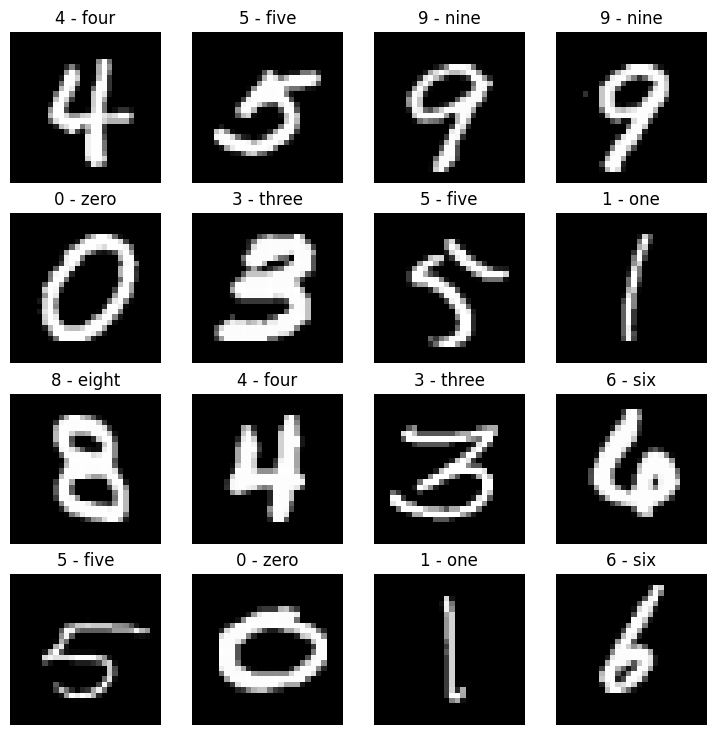

In [4]:
# Plot a random selection of images
# Code in this cell is adapted from this notebook by Francois Regis Dusengimana:
# https://www.kaggle.com/code/faduregis/computer-vision-with-pytorch-using-mnist-dataset

fig = plt.figure(figsize=(9, 9))
n_rows, n_columns = 4, 4
for i in range(1, n_rows * n_columns + 1):
    img, label = train_set[torch.randint(0, len(train_set), size=[1]).item()]
    fig.add_subplot(n_rows, n_columns, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_set.classes[label])
    plt.axis(False)

## Step 3: Define the Neural Network Architecture

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Flatten 28x28 to a 784 vector for fully connected layer
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 output classes for digits 0-9

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Step 4: Initialize the Model, Loss Function, and Optimizer

In [6]:
model = Net().to(device)
criterion = nn.CrossEntropyLoss()  # Suitable for classification with N classes
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Step 5: Train the Neural Network

In [7]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(
                f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

Epoch: 1, Batch: 100, Loss: 1.387
Epoch: 1, Batch: 200, Loss: 0.501
Epoch: 1, Batch: 300, Loss: 0.380
Epoch: 1, Batch: 400, Loss: 0.371
Epoch: 1, Batch: 500, Loss: 0.301
Epoch: 1, Batch: 600, Loss: 0.294
Epoch: 1, Batch: 700, Loss: 0.245
Epoch: 1, Batch: 800, Loss: 0.228
Epoch: 1, Batch: 900, Loss: 0.224
Epoch: 2, Batch: 100, Loss: 0.181
Epoch: 2, Batch: 200, Loss: 0.195
Epoch: 2, Batch: 300, Loss: 0.196
Epoch: 2, Batch: 400, Loss: 0.192
Epoch: 2, Batch: 500, Loss: 0.166
Epoch: 2, Batch: 600, Loss: 0.166
Epoch: 2, Batch: 700, Loss: 0.151
Epoch: 2, Batch: 800, Loss: 0.167
Epoch: 2, Batch: 900, Loss: 0.136
Epoch: 3, Batch: 100, Loss: 0.127
Epoch: 3, Batch: 200, Loss: 0.128
Epoch: 3, Batch: 300, Loss: 0.142
Epoch: 3, Batch: 400, Loss: 0.130
Epoch: 3, Batch: 500, Loss: 0.140
Epoch: 3, Batch: 600, Loss: 0.116
Epoch: 3, Batch: 700, Loss: 0.123
Epoch: 3, Batch: 800, Loss: 0.117
Epoch: 3, Batch: 900, Loss: 0.111
Epoch: 4, Batch: 100, Loss: 0.096
Epoch: 4, Batch: 200, Loss: 0.102
Epoch: 4, Batc

## Step 6: Test the Network on the Test Data

In [8]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

In [9]:
accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

Accuracy of the network on the 10000 test images: 97.26%
